In [81]:
import os.path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [196]:
dataset_ver_walk = input('Dataset Version number (Walk): ')
walk_dataset = pd.read_csv(f'./Sample Datasets/Sample_walk_dataset_{dataset_ver_walk}.csv')
#test_walk_dataset = pd.read_csv(f'./Sample Datasets/Test_walk_dataset_{dataset_ver_walk}.csv')

Dataset Version number (Walk): 9


In [197]:
dataset_ver_run = input('Dataset Version number (Run): ')
run_dataset = pd.read_csv(f'./Sample Datasets/Sample_run_dataset_{dataset_ver_run}.csv')
#test_run_dataset = pd.read_csv(f'./Sample Datasets/Test_run_dataset_{dataset_ver_run}.csv')

Dataset Version number (Run): 9


In [106]:
def count_spikes(list,TS):
    std_spike_val = 8
    diff_ts_spike = 1.0
    prev_spike_ts = 0.0
    counter = 0
    for idx,val in enumerate(list):
        if val >= std_spike_val and TS[idx] - prev_spike_ts >= diff_ts_spike:
            counter+=1
            prev_spike_ts = TS[idx]
        
    print(f'Number of spikes: {counter}')

def plot_one_plot():
    val = input('Which section? (X,Y,Z,Acc): ')
    if val == 'X':
        plt.plot(TS,X,color="red",linewidth=1.0)
    elif val == 'Y':
        plt.plot(TS,Y,color="red",linewidth=1.0)
    elif val == 'Z':
        plt.plot(TS,Z,color="red",linewidth=1.0)
    else:
        plt.axhline(y=12.5)
        plt.axhline(y=10)
        plt.scatter(TS,Acc,s=10,color="blue")
        plt.plot(TS,Acc,color="red",linewidth=1.0)
    plt.xlabel('Time Stamp')
    plt.ylabel('acceleration in m/s (Gravity Incl)')


def plot_sub_plots():
    figure, axis = plt.subplots(2, 2)

    axis[0,0].plot(TS,X,color="red",linewidth=1.0)
    axis[0,0].set_title("WRT X Values")

    axis[0,1].plot(TS,Y,color="blue",linewidth=1.0)
    axis[0,1].set_title("WRT Y Values")

    axis[1,0].plot(TS,Z,color="yellow",linewidth=1.0)
    axis[1,0].set_title("WRT Z Values")

    axis[1,1].plot(TS,X,color="red",linewidth=1.0)
    axis[1,1].plot(TS,Y,color="blue",linewidth=1.0)
    axis[1,1].plot(TS,Z,color="yellow",linewidth=1.0)
    axis[1,1].plot(TS,Acc,color="grey",linewidth=1.0)
    axis[1,1].set_title("WRT X,Y,Z,ACC Values")
    
def preprocessForXandY(dataset_walk, dataset_run):
    X_walk = dataset_walk.iloc[:,[1,3,4,5,6,7,8]]
    y_walk = dataset_walk.iloc[:,[2]]
    X_run = dataset_run.iloc[:,[1,3,4,5,6,7,8]]
    y_run = dataset_run.iloc[:,[2]]
    
    X_frames = [X_walk,X_run]
    X = pd.concat(X_frames)
    Y_frames = [y_walk,y_run]
    y = pd.concat(Y_frames)
    return X,y

def accuracyNums(y_exp, y_pred):
    model_accuracy = accuracy_score(y_exp, y_pred)
    return (model_accuracy,confusion_matrix(y_exp,y_pred))

def saveMyModel(model,version_num):
    file_name = f'trained_models/run_walk_model_v{version_num}'
    if os.path.isfile(f'{file_name}.h5') is False:
        model.save(f'{file_name}.h5')
    converter = tf.lite.TFLiteConverter.from_keras_model(model)
    tflite_model = converter.convert()
    with open(f'{file_name}.tflite', 'wb') as f:
      f.write(tflite_model)
    interpreter = tf.lite.Interpreter(model_path=f'{file_name}.tflite')
    interpreter.allocate_tensors()

    print(f'Model saved as: {file_name} in h5 and tflite')
    # Print input shape and type
    inputs = interpreter.get_input_details()
    print('{} input(s):'.format(len(inputs)))
    for i in range(0, len(inputs)):
        print('{} {}'.format(inputs[i]['shape'], inputs[i]['dtype']))

    # Print output shape and type
    outputs = interpreter.get_output_details()
    print('\n{} output(s):'.format(len(outputs)))
    for i in range(0, len(outputs)):
        print('{} {}'.format(outputs[i]['shape'], outputs[i]['dtype']))

run or walk? run
What type of plot? Single (S) or Multiple (M) or count spikes (CS): M


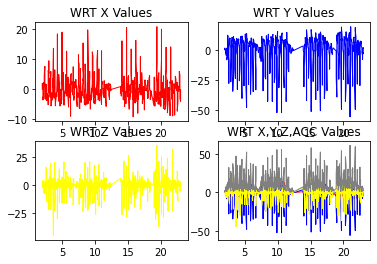

In [43]:
choice = input('run or walk? ')
if choice == 'run':
    matrix = run_dataset
else:
    matrix = walk_dataset
plot_type = input('What type of plot? Single (S) or Multiple (M) or count spikes (CS): ')
LR = matrix.iloc[:,[0]].values
RW = matrix.iloc[:,[1]].values
X = matrix.iloc[:,[2]].values
Y = matrix.iloc[:,[3]].values
Z = matrix.iloc[:,[4]].values
Acc = matrix.iloc[:,[5]].values
#TS_i = matrix.iloc[:,[4]].values[0]
#TS = (matrix.iloc[:,[4]].values - TS_i)/100000000
TS = matrix.iloc[:,[6]].values
if TS[0] > 100000000:
    TS = convert_ts(TS)
if plot_type == 'S':
    plot_one_plot()
elif plot_type == 'M': 
    plot_sub_plots()
else:
    count_spikes(Acc,TS=TS)
plt.show()

In [198]:
X,y = preprocessForXandY(walk_dataset,run_dataset)
#X_train, X_test, y_train, y_test = preprocessForXandY(walk_dataset,run_dataset)
print(f'{X} \n {y}')

    Age  X_a  Y_a  Z_a  X_g  Y_g  Z_g
0    21  2.7 -9.2 -0.9  0.0  0.0  0.0
1    21  2.5 -8.5 -0.5 -0.5 -0.3 -0.3
2    21  1.3 -8.5 -2.0  0.3 -0.3  0.0
3    21  0.5 -9.3  2.0  0.7  0.7  0.3
4    21  0.5 -9.6  1.3 -0.8 -0.8 -0.5
..  ...  ...  ...  ...  ...  ...  ...
48   21  3.5 -8.4 -0.1  0.3  0.2 -0.1
49   21  4.0 -9.6  0.2  0.1  0.1 -0.1
50   21  3.9 -9.6 -0.3  0.0  0.0  0.1
51   21  2.8 -9.3  0.9  0.0  0.3  0.2
52   21  4.5 -8.8 -1.2  0.0  0.2  0.2

[79 rows x 7 columns] 
     Mode
0      1
1      1
2      1
3      1
4      1
..   ...
48     0
49     0
50     0
51     0
52     0

[79 rows x 1 columns]


In [132]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [194]:
model_v = input('Version: ')
file_name = f'trained_models/run_walk_model_v{model_v}.h5'
model = keras.models.load_model(file_name)

Version: 2.8


In [133]:
model = Sequential([
    Dense(units=16, input_shape=(7,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [185]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 16)                128       
_________________________________________________________________
dense_13 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_14 (Dense)             (None, 2)                 66        
Total params: 738
Trainable params: 738
Non-trainable params: 0
_________________________________________________________________


In [199]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x=X,y=y, batch_size=5, validation_split=0.1,epochs=50, shuffle=False,verbose=2)

Epoch 1/50
15/15 - 0s - loss: 0.4774 - accuracy: 0.7746 - val_loss: 1.2927 - val_accuracy: 0.1250
Epoch 2/50
15/15 - 0s - loss: 0.4135 - accuracy: 0.8169 - val_loss: 1.0882 - val_accuracy: 0.2500
Epoch 3/50
15/15 - 0s - loss: 0.3993 - accuracy: 0.8028 - val_loss: 0.9439 - val_accuracy: 0.2500
Epoch 4/50
15/15 - 0s - loss: 0.3985 - accuracy: 0.8028 - val_loss: 0.8690 - val_accuracy: 0.2500
Epoch 5/50
15/15 - 0s - loss: 0.3994 - accuracy: 0.8169 - val_loss: 0.8369 - val_accuracy: 0.2500
Epoch 6/50
15/15 - 0s - loss: 0.3985 - accuracy: 0.8451 - val_loss: 0.8264 - val_accuracy: 0.2500
Epoch 7/50
15/15 - 0s - loss: 0.3962 - accuracy: 0.8451 - val_loss: 0.8233 - val_accuracy: 0.2500
Epoch 8/50
15/15 - 0s - loss: 0.3928 - accuracy: 0.8451 - val_loss: 0.8225 - val_accuracy: 0.2500
Epoch 9/50
15/15 - 0s - loss: 0.3897 - accuracy: 0.8451 - val_loss: 0.8240 - val_accuracy: 0.2500
Epoch 10/50
15/15 - 0s - loss: 0.3866 - accuracy: 0.8451 - val_loss: 0.8276 - val_accuracy: 0.2500
Epoch 11/50
15/15 -

In [195]:
new_walk_dataset = pd.read_csv(f'./Sample Datasets/Sample_walk_dataset_9.csv')
new_run_dataset = pd.read_csv(f'./Sample Datasets/Sample_run_dataset_9.csv')
test_X,test_y = preprocessForXandY(new_walk_dataset,new_run_dataset)
model_predictions = model.predict(x=test_X, batch_size=10, verbose=0)
round_pred = np.argmax(model_predictions, axis=-1)
print(accuracyNums(test_y,round_pred))

(0.7215189873417721, array([[35, 18],
       [ 4, 22]], dtype=int64))


In [114]:
new_walk_dataset = pd.read_csv(f'./Sample Datasets/Sample_walk_dataset_3.csv')
# new_run_dataset = pd.read_csv(f'./Sample Datasets/Sample_run_dataset_3.csv')
# X,y = preprocessForXandY(new_walk_dataset,new_run_dataset)
# preds = model.predict(X)
# preds
# print(model.predict([[-0.5,-0.6,0.5],
# [0.5,-1.3,-0.1],
# [0,-0.2,-1.3],
# [-0.3,-0.2,-0.6],
# [0.1,-1.3,1.2]]))


# print(model.predict([[0.4,1.4,-6.9],
# [-0.9,1.2,-2.2],
# [-2.1,1.8,1.9],
# [-1.8,3,2.2],
# [1.5,3.7,2.2]]))

array([[0.48831064, 0.51168936],
       [0.7246048 , 0.27539524],
       [0.769928  , 0.23007202],
       [0.28395227, 0.7160477 ],
       [0.268042  , 0.73195803],
       [0.4049483 , 0.59505177],
       [0.37818846, 0.6218115 ],
       [0.4677565 , 0.53224343],
       [0.68305814, 0.31694192],
       [0.25774643, 0.7422536 ],
       [0.26335788, 0.7366421 ],
       [0.4591262 , 0.5408738 ],
       [0.49045157, 0.50954837],
       [0.60607976, 0.39392024],
       [0.80026025, 0.19973971],
       [0.32416677, 0.6758332 ],
       [0.28501502, 0.71498495],
       [0.63862765, 0.36137235],
       [0.4330724 , 0.5669276 ],
       [0.55975807, 0.440242  ],
       [0.8544008 , 0.14559922],
       [0.3029705 , 0.69702953],
       [0.26699275, 0.73300725],
       [0.35688248, 0.6431175 ],
       [0.3019657 , 0.69803435],
       [0.4842254 , 0.5157746 ],
       [0.4884622 , 0.51153785],
       [0.46648708, 0.5335129 ],
       [0.27464747, 0.7253525 ],
       [0.37868905, 0.6213109 ],
       [0.

In [200]:
saveMyModel(model,input('Model Version No. '))

Model Version No. 2.9
INFO:tensorflow:Assets written to: C:\Users\Mihir\AppData\Local\Temp\tmp3t2t8lu9\assets


INFO:tensorflow:Assets written to: C:\Users\Mihir\AppData\Local\Temp\tmp3t2t8lu9\assets


Model saved as: trained_models/run_walk_model_v2.9 in h5 and tflite
1 input(s):
[1 7] <class 'numpy.float32'>

1 output(s):
[1 2] <class 'numpy.float32'>


In [76]:
from sklearn.neighbors import KNeighborsClassifier

In [77]:
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)

c:\users\mihir\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [78]:
prediction_KNN = KNN.predict(X_test)
accuracy_knn = accuracy_score(y_test, prediction_KNN)
print (accuracy_knn,confusion_matrix(y_test,prediction_KNN))

0.7969924812030075 [[46 19]
 [ 8 60]]


In [80]:
prediction_KNN = KNN.predict([[0.4,1.4,-6.9],
[-0.9,1.2,-2.2],
[-2.1,1.8,1.9],
[-1.8,3,2.2],
[1.5,3.7,2.2]])
prediction_KNN

array([1, 0, 0, 0, 1], dtype=int64)